# Plot DA simulation

In [2]:
%cd Experiment-Simulation

/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/local/Experiment-Simulation


In [1]:
%matplotlib notebook

from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces

In [3]:
root = 'Dopamine-dSPN-network/'
simroot = root + 'simulation/'
fn = [simroot + 'network-voltage-AChB-network-level4.csv',\
      simroot + 'network-voltage-DA-network-control.csv']




root = 'Dopamine-dSPN-network/'
nf = [root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5']





In [4]:
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels = ['ACh burst', 'control'],colours=['red','black'])


Unable to guess ID, using 666.
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions


In [5]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

def firing_frequency(obj_loaded_traces,type_cell='dSPN'):

    data = obj_loaded_traces.get_traces(neuronType=type_cell)
    data_spikes = dict()
    data_average = dict()
    for ctr, network in data.items():
        data_spikes.update({ctr : dict()})
        data_average.update({ctr : dict()})
        for k, volt in network.items():
            neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
            spike = elp.spike_train_generation.threshold_detection(neov)
            data_spikes[ctr].update({k : spike})

            if len(spike) >2:
                print(spike)
                av = elp.statistics.mean_firing_rate(spike,t_start=1 * pq.s, t_stop= 1.5 *pq.s)
                
                data_average[ctr].update({k : av})
            
    return data_spikes, data_average

In [6]:
def plot_mean_frequency(data_average,labels_v=['V0', 'V1'],exp_title=None):
    
    fig, ax = plt.subplots()
    pos = 0
    for k, average in data_average.items():
        ax.bar([pos], [np.array([*average.values()]).mean()],yerr=[np.array([*average.values()]).std()], align='center', alpha=0.5, ecolor='black', capsize=10)
        #ax.scatter(np.random.rand(len([*average.values()]))*0.01 -0.005 + pos ,[*average.values()])
        pos=pos+1
        
    ax.set_ylabel('Mean frequency (Hz)')
    ax.set_title('Mean frequency (Hz)')
    ax.set_xticks([*data_average.keys()])
    ax.set_xticklabels(labels_v)


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig('Level4/'+exp_title+'_mean_freuquency.svg')
    plt.show()

[1.27   1.434  1.5035] s
[1.2035 1.228  1.2505 1.27   1.287  1.3055 1.3255 1.347  1.3715 1.3905
 1.4075 1.4215 1.438  1.454  1.4665 1.483  1.5005 1.5245] s
[1.1915 1.282  1.365  1.438  1.485 ] s
[1.1855 1.202  1.227  1.256  1.278  1.302  1.3255 1.3765 1.3995 1.4235] s
[1.1405 1.1805 1.2055 1.2335 1.263  1.2925 1.3135 1.337  1.36   1.3755
 1.4005 1.4225 1.4575 1.485 ] s
[1.271  1.313  1.339  1.3665 1.389  1.4615 1.554 ] s
[1.244  1.268  1.2965 1.3255 1.35   1.371  1.4    1.4175 1.444  1.4635
 1.5045] s
[1.2895 1.37   1.44   1.4665] s
[1.1535 1.1815 1.198  1.2155 1.2315 1.2495 1.263  1.2795 1.2955 1.3145
 1.329  1.344  1.361  1.3775 1.3935 1.41   1.426  1.4415 1.458  1.4735
 1.4865 1.5045 1.5245] s
[1.175  1.2055 1.2245 1.2485 1.2675 1.283  1.3055 1.328  1.346  1.362
 1.3855 1.4005 1.415  1.4285 1.446  1.462  1.479  1.4945 1.522 ] s
[1.2505 1.2695 1.285  1.305  1.3245 1.346  1.3685 1.387  1.405  1.4185
 1.4345 1.4495 1.463  1.48   1.4985 1.5175 1.55  ] s
[1.253  1.3325 1.427  1.4795] s
[

<IPython.core.display.Javascript object>


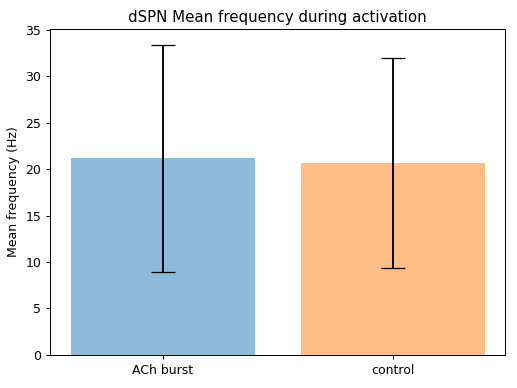

In [7]:
spikes_dSPN, average_dSPN = firing_frequency(kl,type_cell='dSPN')
plot_mean_frequency(average_dSPN,labels_v=['ACh burst', 'control'],exp_title='dSPN Mean frequency during activation')

In [8]:
def percentage_spike(obj_loaded_traces,type_cell='dSPN',total=None):
    
    ratio = dict()
    
    data_dict = obj_loaded_traces.get_traces(neuronType=type_cell)
    for k, data in data_dict.items():
        
        depol = 0
        spike = 0
        
        for t, voltages in data.items():
            if max(voltages)<0:
                depol=depol+1
            else:
                spike=spike+1
                
        ratio.update({k : {'spike': spike, 'pol' : depol, 'percentage': spike/total*100}})
        
    return ratio

per_dSPN = percentage_spike(kl,type_cell='dSPN',total=30)

In [9]:
def plot_percentage(percentages,chosen=[3,4],labels_v=['control','DA'],c=['black','red'],exp_title='dSPN'):
    fig, ax = plt.subplots()
    pos = 3
    for k, per in percentages.items():
        if k in chosen:
            ax.bar([k], [per['percentage']],align='center', alpha=0.5, ecolor='black', capsize=10,width=0.4,color=c[k])
            
    ax.set_ylabel('Percentage spiking neurons (total) %')
    ax.set_title('Ratio spike/pol')
    ax.set_xticks(range(len(chosen)))
    ax.set_xticklabels(labels_v)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


    plt.tight_layout()
    plt.title(exp_title)
    plt.savefig('Level4/'+exp_title+'_precentage.svg')
    plt.show()

<IPython.core.display.Javascript object>


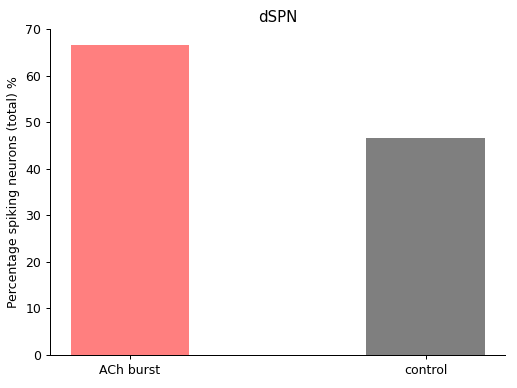

In [10]:
plot_percentage(per_dSPN,exp_title='dSPN',labels_v=['ACh burst', 'control'],chosen=[0,1],c=['red','black'])

Loading 30 neurons with 441 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Plotted 30 traces (total 30)


<IPython.core.display.Javascript object>


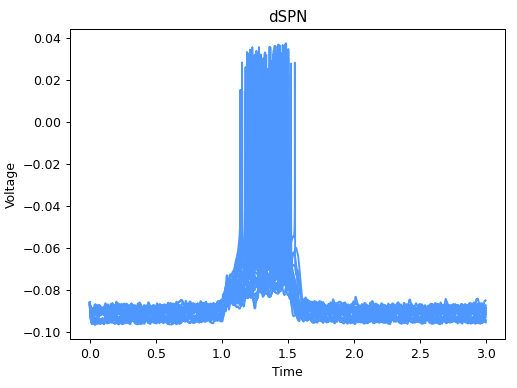

Saving to figure Network-spikes-4-dSPN-colour.pdf


In [11]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 30

network_path = 'Dopamine-dSPN-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-AChB-network-level4.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


Unable to guess ID, using 666.
Loading 30 neurons with 441 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 30)


<IPython.core.display.Javascript object>


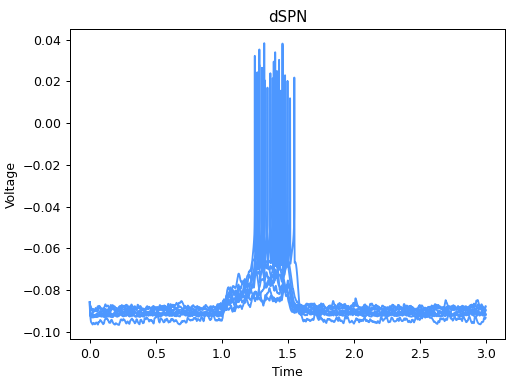

Saving to figure Network-spikes-666-dSPN-colour.pdf
No traces of iSPN to show
No traces of FSN to show


In [12]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

network_path = 'Dopamine-dSPN-network'
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-network-control.csv")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plotTraceNeuronType(neuron_type="FSN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


In [13]:
from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces

In [14]:
root = 'Dopamine-dSPN-network/'

root = 'Dopamine-dSPN-network/'
simroot = root + 'simulation/'
fn = [simroot + 'network-voltage-AChB-network-level4.csv',\
      simroot + 'network-voltage-DA-network-control.csv']




root = 'Dopamine-dSPN-network/'
nf = [root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5']






nl = comparePlotTraces(fileNames=fn,\
                      networkFiles=nf,labels=['DA', 'Control'],colours=['red','black'],save_dir='Compare-network/')
kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['DA', 'Control'],colours=['red','black'])

Unable to guess ID, using 666.
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions
Unable to guess ID, using 666.
Loading 30 neurons with 441 synapses and 0 gap junctions
Loading 30 neurons with 441 synapses and 0 gap junctions


<IPython.core.display.Javascript object>


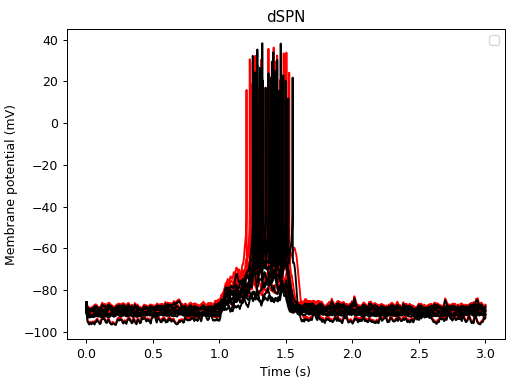

No handles with labels found to put in legend.


Saving to figure Compare-network/figs/Network-spikes-666-dSPN-colour.svg


In [15]:
%matplotlib notebook
plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 10

nl.plotTraceNeuronType(neuronType="dSPN", nTraces=10, offset=plot_offset, skipTime=skip_time)


In [ ]:
import elephant as elp
import neo
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
depol = dict()
plt.figure(10)
for k, volt in data[1].items():
    if max(volt) < 0:
        depol.update({k : data[0][k] - volt})
        #plt.plot(depol[k])
plt.plot(np.array([*depol.values()]).mean(axis=0)[int(1/5e-4):int(1.5/5e-4)]*1e3)
plt.show()

In [ ]:
np.mean(np.array([*depol.values()]).mean(axis=0)[int(1/5e-4):int(1.5/5e-4)]*1e3)

In [ ]:
data = kl.get_traces(neuronType="dSPN")
data_spikes = dict()
data_average = dict()
for ctr, network in data.items():
    data_spikes.update({ctr : dict()})
    data_average.update({ctr : dict()})
    for k, volt in network.items():
        neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
        spike = elp.spike_train_generation.threshold_detection(neov)
        data_spikes[ctr].update({k : spike})

        if len(spike) != 0:
            av = elp.statistics.mean_firing_rate(spike,t_start=0.5 * pq.s, t_stop= 2 *pq.s)
        else:
            av = 0 * pq.Hz
        data_average[ctr].update({k : av})

In [ ]:
delays = list()
for k, st in data_spikes[1].items():
    if len(st) > 0 and len(data_spikes[0][k])>0:
        delay = min(data_spikes[0][k].tolist()) - min(st.tolist())
        delays.append(delay)

fig, ax = plt.subplots()
ax.bar([0], np.array(delays).mean(),yerr=np.array(delays).std(), align='center',alpha=0.5, ecolor='black', capsize=10,width=0.1)
ax.scatter(np.random.rand(len(delays))*0.01 -0.005 ,delays)

ax.set_ylabel('Delays (s)')
ax.set_title('Delays (s)')
#ax.set_xticks([0])
#ax.set_xticklabels(['Compare'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
np.array([*data_average[0].values()]).mean()
np.array([*data_average[0].values()]).std()

In [ ]:
np.array([*data_average[1].values()]).mean()
np.array([*data_average[1].values()]).std()

In [ ]:
np.array([*data_average[1].values()])

In [ ]:
fig, ax = plt.subplots()
ax.bar([0,1], [np.array([*data_average[0].values()]).mean(),np.array([*data_average[1].values()]).mean()],yerr=[np.array([*data_average[0].values()]).std(),np.array([*data_average[1].values()]).std()], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.scatter(np.random.rand(len(np.array([*data_average[0].values()])))*0.2 - 0.1,np.array([*data_average[0].values()]))
ax.scatter(np.random.rand(len(np.array([*data_average[1].values()])))*0.2 + 0.9,np.array([*data_average[1].values()]))
ax.set_ylabel('Mean frequency (Hz)')
ax.set_title('Mean frequency (Hz)')
ax.set_xticks([0,1])
ax.set_xticklabels(['Dopamine', 'Control'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
import quantities as pq
from elephant import statistics, kernels
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh
np.random.seed(6)
spiketrains = [*data_spikes[0].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates0 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates0)
plt.show()

In [ ]:
spiketrains = [*data_spikes[1].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates1 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates1)
plt.show()

In [ ]:
import neo
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
from viziphant.events import add_event

np.random.seed(11)

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
event = neo.Event([0.5]*pq.s, labels=['Dopamine'])
k = 0
for axis in axes:
    spiketrains = [*data_spikes[k].values()]
    histogram = statistics.time_histogram(spiketrains,
                                          bin_size=0.1 * pq.s,
                                          output='rate')
    plot_time_histogram(histogram, axes=axis, units='s')
    k = k + 1
add_event(axes, event=event)
plt.show()

In [ ]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains = spiketrains = [*data_spikes[1].values()]
histogram1 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram1, units='s')
plt.show()

In [ ]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains =  [*data_spikes[0].values()]
histogram0 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram0, units='s')
plt.show()

In [ ]:
hist = histogram0.as_array() - histogram1.as_array()

In [ ]:
plt.figure(0)
plt.bar(np.arange(len(np.transpose(hist)[0])),np.transpose(hist)[0],align='edge',width=1)

In [ ]:
data = kl.get_traces(neuronType="iSPN")
data_spikes = dict()
for ctr, network in data.items():
    data_spikes.update({ctr : dict()})
    for k, volt in network.items():
        neov = neo.AnalogSignal(volt, units='V',sampling_period = 5e-4 * pq.s)
        spike = elp.spike_train_generation.threshold_detection(neov)
        data_spikes[ctr].update({k : spike})

In [ ]:
delays = list()
for k, st in data_spikes[1].items():
    if len(st) > 0 and len(data_spikes[0][k])>0:
        delay = min(st.tolist()) - min(data_spikes[0][k].tolist())
        delays.append(delay)

In [ ]:
fig, ax = plt.subplots()
ax.bar([0], np.array(delays).mean(),yerr=np.array(delays).std(), align='center',alpha=0.5, ecolor='black', capsize=10,width=0.1)
ax.scatter(np.random.rand(len(delays))*0.01 -0.005 ,delays)

ax.set_ylabel('Delays (s)')
ax.set_title('Delays (s)')
#ax.set_xticks([0])
#ax.set_xticklabels(['Compare'])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
import quantities as pq
from elephant import statistics, kernels
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from viziphant.statistics import plot_instantaneous_rates_colormesh
np.random.seed(6)
spiketrains = [*data_spikes[0].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates0 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates0)
plt.show()

In [ ]:
spiketrains = [*data_spikes[1].values()]
kernel = kernels.GaussianKernel(sigma=100 * pq.ms)
rates1 = statistics.instantaneous_rate(spiketrains,
                                      sampling_period=5e-4 * pq.s,
                                      kernel=kernel)
plot_instantaneous_rates_colormesh(rates1)
plt.show()

In [ ]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains = spiketrains = [*data_spikes[1].values()]
histogram1 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram1, units='s')
plt.show()

In [ ]:
import quantities as pq
import matplotlib.pyplot as plt
from elephant.spike_train_generation import homogeneous_poisson_process
from elephant import statistics
from viziphant.statistics import plot_time_histogram
np.random.seed(14)

spiketrains =  [*data_spikes[0].values()]
histogram0 = statistics.time_histogram(spiketrains, bin_size=100*pq.ms)

plot_time_histogram(histogram0, units='s')
plt.show()

In [ ]:
hist = histogram0.as_array() - histogram1.as_array()

In [ ]:
%matplotlib notebook
plt.figure(4)
plt.step(np.arange(len(np.transpose(histogram0.as_array())[0])),np.transpose(histogram0.as_array())[0])
plt.show()

In [ ]:
%matplotlib notebook
plt.figure(4)
plt.step(np.arange(len(np.transpose(hist)[0])),np.transpose(hist)[0])
plt.show()

In [ ]:
histogram0.as_array()